In [5]:
import os
import random

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [5, 5]
matplotlib.rcParams['figure.dpi'] = 200
import ssl_project.data_loaders.plot_utils as plot_utils

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision

from ssl_project.data_loaders.data_helper import UnlabeledDataset, LabeledDataset
from ssl_project.data_loaders.helper import collate_fn, draw_box

In [6]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0);

In [7]:
# All the images are saved in image_folder
# All the labels are saved in the annotation_csv file


In [8]:
# You shouldn't change the unlabeled_scene_index
# The first 106 scenes are unlabeled
unlabeled_scene_index = np.arange(106)
# The scenes from 106 - 133 are labeled
# You should devide the labeled_scene_index into two subsets (training and validation)
labeled_scene_index = np.arange(106, 134)

# Load labeled dataset

In [9]:
transform = torchvision.transforms.ToTensor()

# The labeled dataset can only be retrieved by sample.
# And all the returned data are tuple of tensors, since bounding boxes may have different size
# You can choose whether the loader returns the extra_info. It is optional. You don't have to use it.
labeled_trainset = LabeledDataset(image_folder=image_folder,
                                  annotation_file=annotation_csv,
                                  scene_index=labeled_scene_index,
                                  transform=transform,
                                  extra_info=True
                                 )
trainloader = torch.utils.data.DataLoader(labeled_trainset, batch_size=2, shuffle=True, num_workers=2, collate_fn=collate_fn)

NameError: name 'image_folder' is not defined

In [6]:
sample, target, road_image, extra = labeled_trainset[5]
sample.shape

torch.Size([6, 3, 256, 306])

In [136]:
cam_names = ["CAM_FRONT_LEFT", "CAM_FRONT", "CAM_FRONT_RIGHT", "CAM_BACK_LEFT", "CAM_BACK", "CAM_BACK_RIGHT"]
cam_angle = [60,                    0,             -60,           120,            180,          -120]
idx_to_angle = dict(enumerate(cam_angle))





n_h, n_w = 256, 306
x, y = np.meshgrid(np.arange(w), np.arange(h),)
x_y = np.vstack((x.ravel(), y.ravel()))


In [155]:
sample, target, road_image, extra = labeled_trainset[250]
sample.shape

# boounding box
# (7,8)----------(3,4)
#   |              |
# (5,6)----------(1,2)



torch.Size([6, 3, 256, 306])

In [226]:
len(labeled_trainset)

3528

In [203]:
reload(projections)

<module 'projections' from '/home/marina/Documents/DL/project/ssl_project/projections.py'>

In [229]:
35 * 15 / 60

8.75

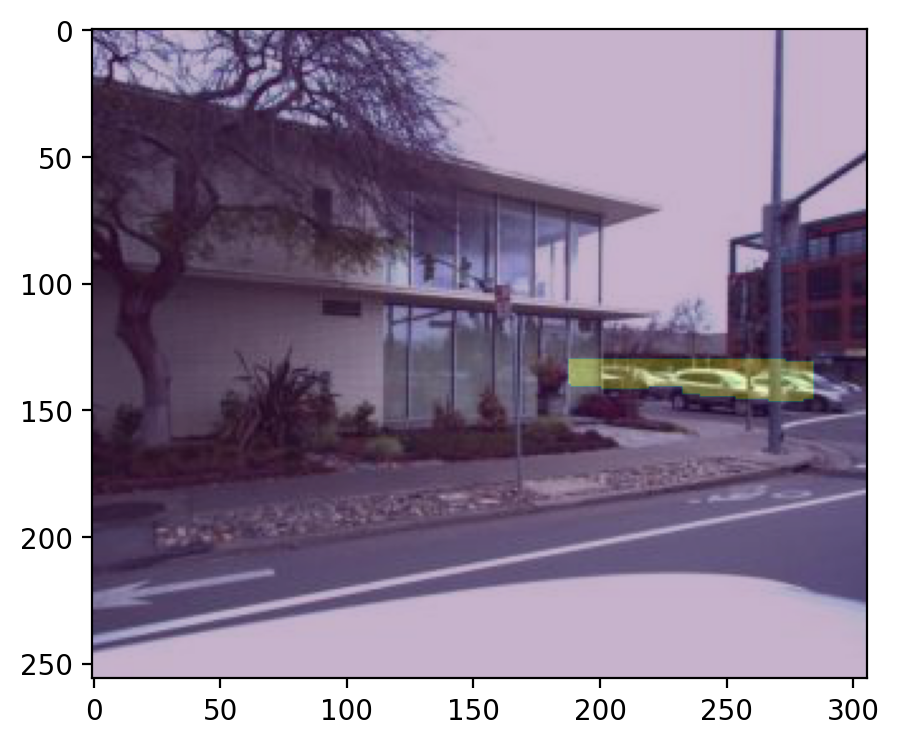

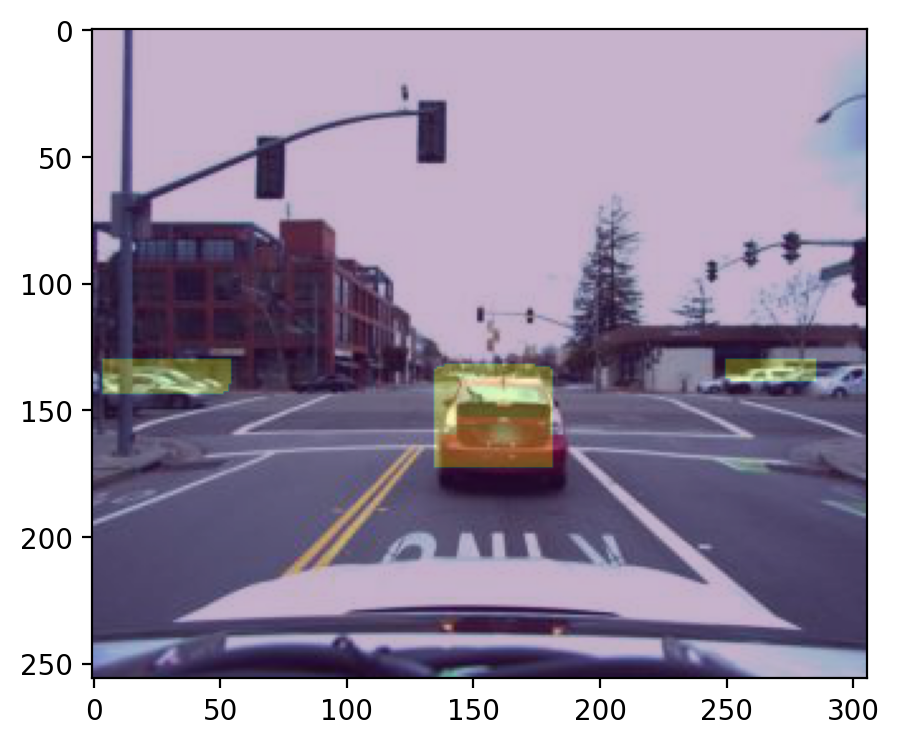

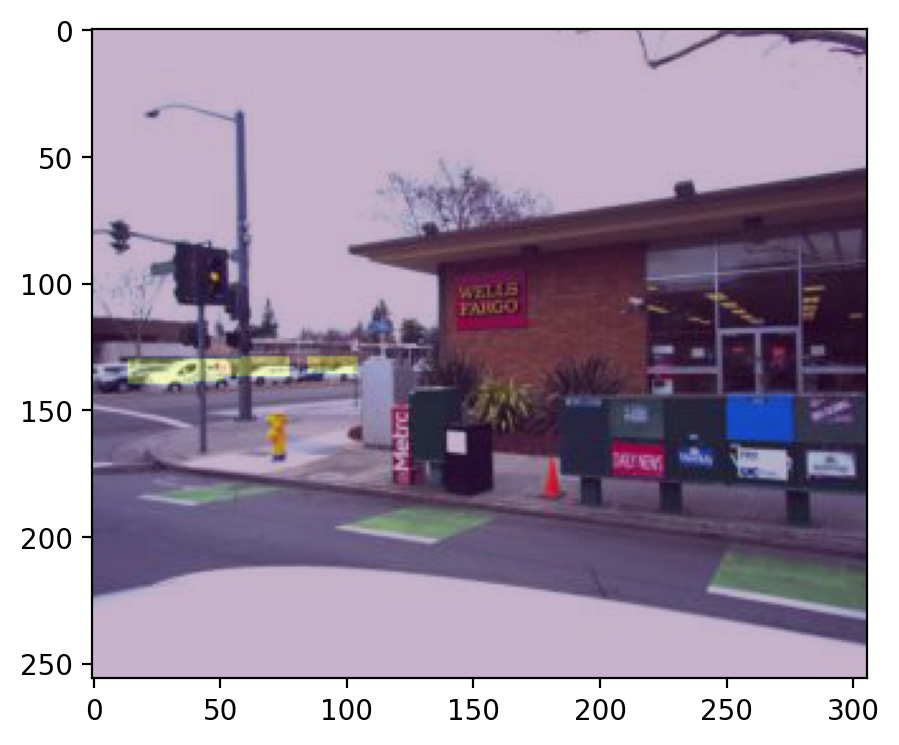

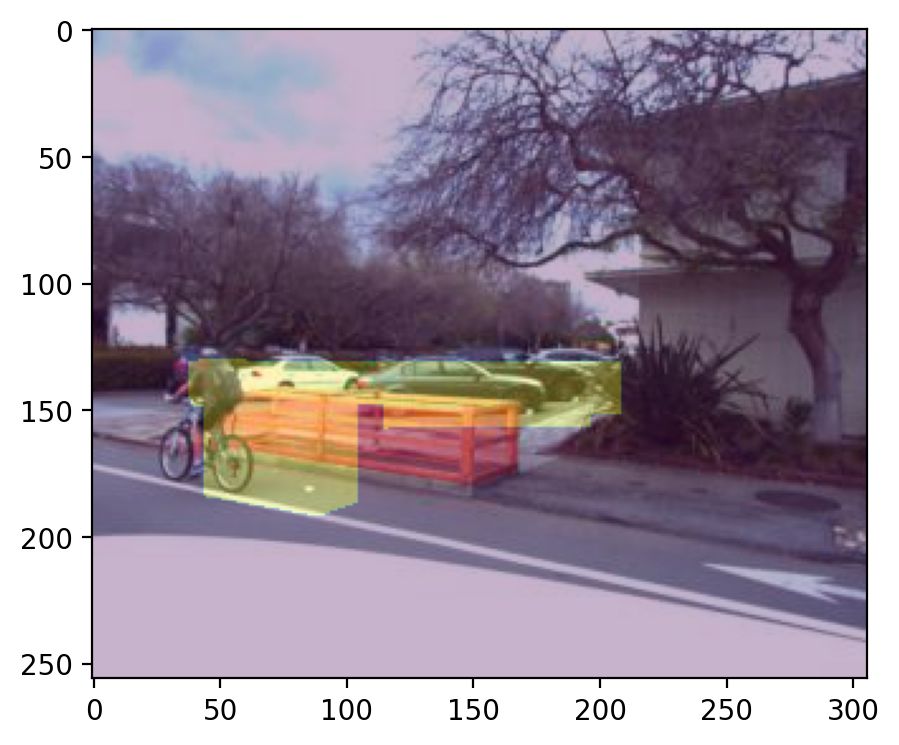

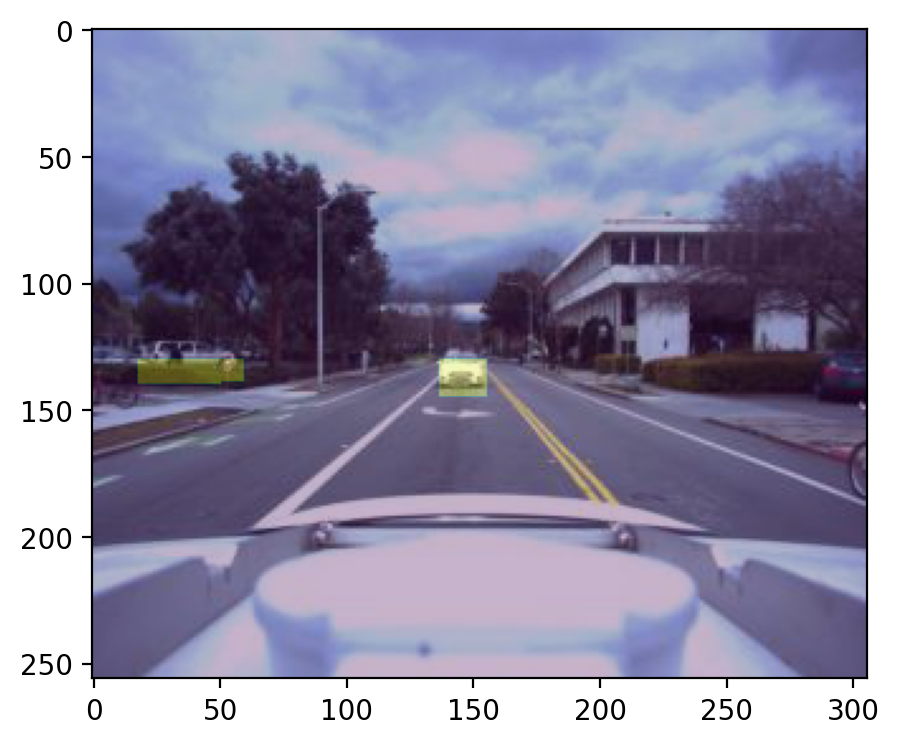

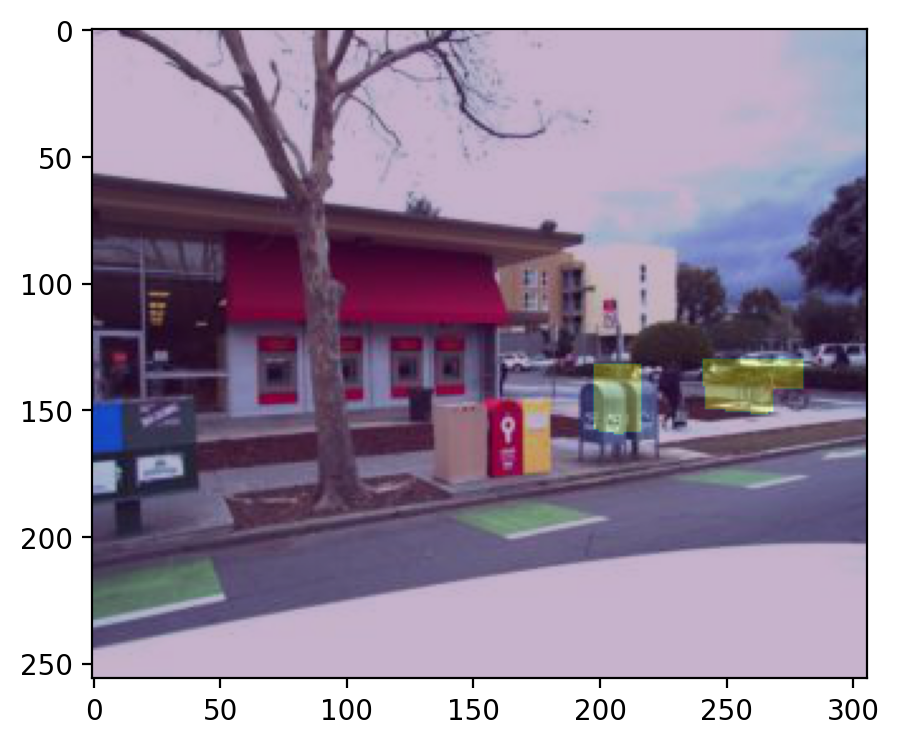

In [225]:

for k_idx in range(6):
    plot_utils.plot_photos(sample[k_idx])
    plt.imshow(mask_6hw[k_idx], alpha=0.3)
    plt.show()

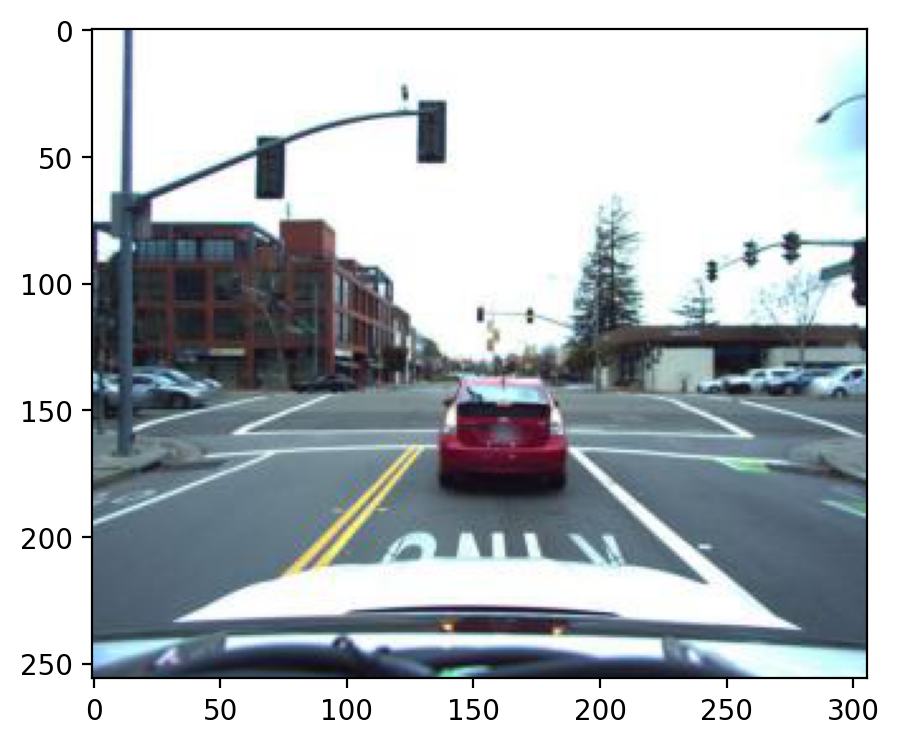

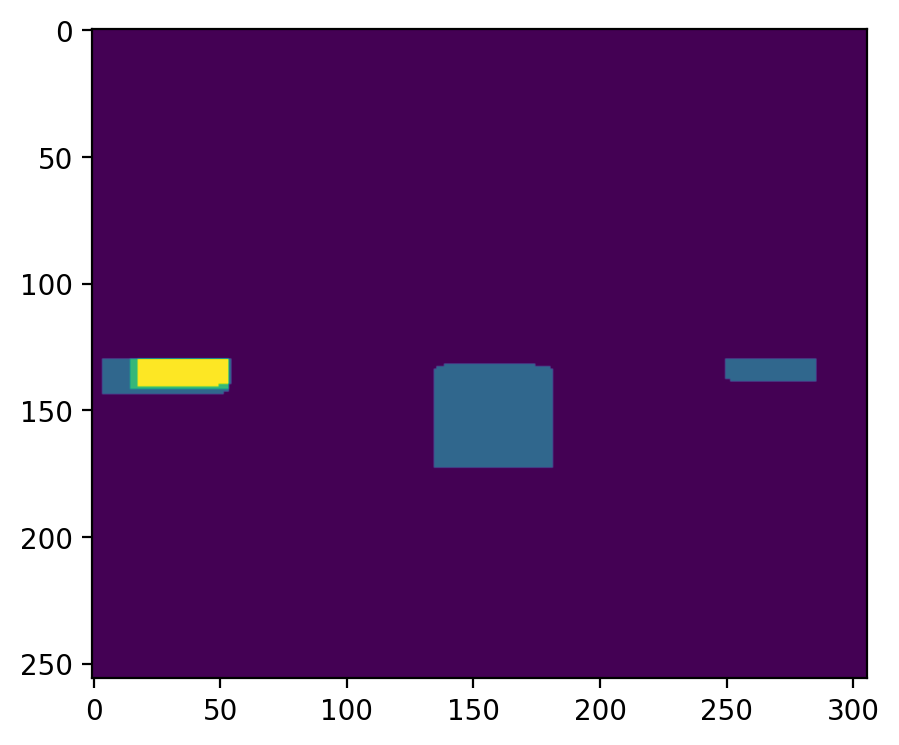

In [147]:
plt.imshow(mask_6hw[1])

In [148]:
def get_pixel_segmentation_for_photos(target):
    cars_n = np.array([
        to_np(target["bounding_box"][car_idx].T)
        for car_idx in range(len(target["bounding_box"]))
    ])
    
    target_6hw = np.zeros((6, n_h, n_w))

    for photo_idx in range(6):
        proj_plane = projections.ProjectionPlane(1.7, 70, idx_to_angle[photo_idx])
        valid_n = proj_plane.is_valid(cars_n)

        for yz_42, yz_top_42 in zip(proj_plane(cars_n[valid_n]), 
                                    proj_plane(cars_n[valid_n], 1.5)):
            points = np.vstack((yz_42, yz_top_42))
            hull = Delaunay(points)
            mask_hw = (hull.find_simplex(x_y.T) >= 0).reshape(h, w)
            target_6hw[photo_idx][mask_hw] = 1
    
    return target_6hw


In [132]:
sample.shape

torch.Size([6, 3, 256, 306])

In [154]:
x_y.shape

(2, 78336)

In [123]:
target["bounding_box"].shape

torch.Size([21, 2, 4])

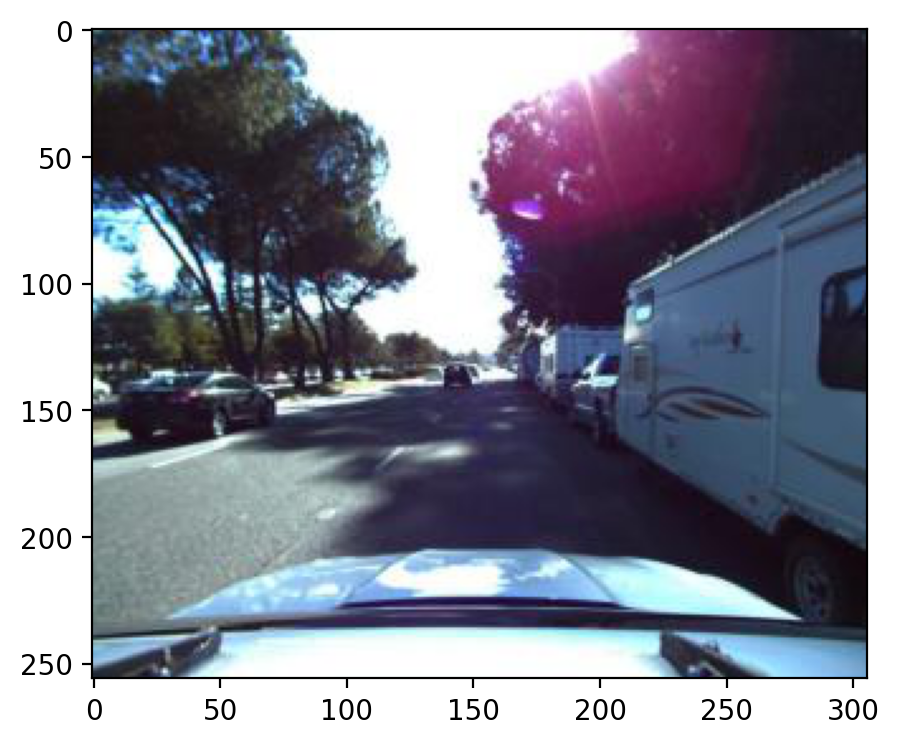

In [7]:
plot_utils.plot_photos(sample[1])

In [8]:
car_idces = np.arange(25) # [7]#,9, 16,17,18]

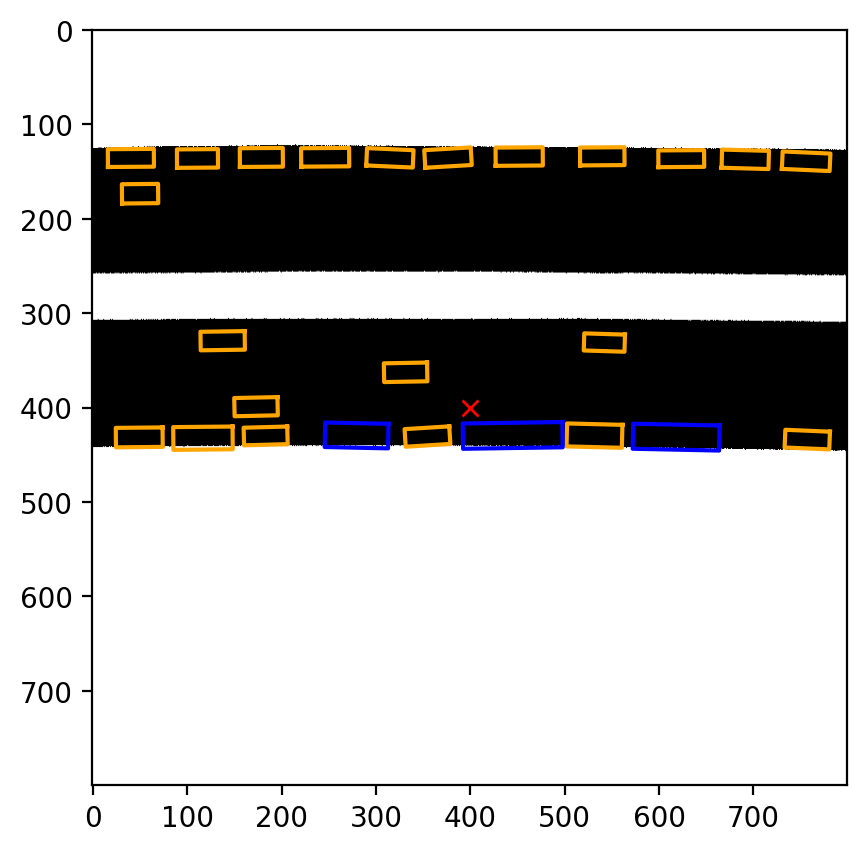

In [9]:
plot_utils.plot_bb(
    road_image, target, 
    b_slc=car_idces
)

# Projections

In [10]:
from importlib import reload

In [11]:
import projections
reload(projections)

<module 'projections' from '/home/marina/Documents/DL/project/ssl_project/projections.py'>

In [39]:
"%3f  asdf %s" % (2, 234)

'2.000000  asdf 234'

In [43]:
"%05d" % 2

'00002'

In [46]:
f"{1111111:05d}"

'1111111'

In [13]:
from utils import to_np

In [15]:


# fig, axis = plt.subplots(1, 1)
# plot_utils.plot_bb(
#     road_image, target, 
#     b_slc=car_idces[proj_plane.is_valid(cars_n)],
#     axis=axis
# )

# x = np.linspace(0, 800,100)
# for k in [
# #     np.sqrt(3),   -np.sqrt(3),
#           np.sqrt(1/3), -np.sqrt(1/3), ]:
#     axis.plot(x, 400 + k * (x - 400))
    
# axis.axvline(400)


In [28]:
sample, target, road_image, extra = labeled_trainset[250]
sample.shape

# boounding box
# (7,8)----------(3,4)
#   |              |
# (5,6)----------(1,2)

cars_n = np.array([
    to_np(target["bounding_box"][car_idx].T)
    for car_idx in range(len(target["bounding_box"]))
])

In [86]:
yz_42

array([[309.45669545, 113.51553141],
       [300.93358144, 113.05659219],
       [275.40605036, 115.35120216],
       [267.05447858, 115.00261763]])

In [113]:
points = np.vstack((yz_42, yz_42_top)) - 50

from scipy.spatial import ConvexHull, Delaunay

x_y

h, w = 256, 306
grid = np.zeros((h, w))
# points = np.random.rand(10, 2) * 100
x, y = np.meshgrid(np.arange(w), np.arange(h),)
x_y = np.vstack((x.ravel(), y.ravel()))
hull = Delaunay(points)

mask = (hull.find_simplex(x_y.T) >= 0).reshape(h, w)
grid[mask] = 1
plt.imshow(grid)
plt.scatter(points[:, 0], points[:, 1])


In [ ]:
h, w = 256, 306
grid = np.zeros((h, w))
# points = np.random.rand(10, 2) * 100
x, y = np.meshgrid(np.arange(w), np.arange(h),)
x_y = np.vstack((x.ravel(), y.ravel()))
hull = Delaunay(points)

mask = (hull.find_simplex(x_y.T) >= 0).reshape(h, w)
grid[mask] = 1
plt.imshow(grid)
plt.scatter(points[:, 0], points[:, 1])

In [150]:
ls

constants.py            model_loader.py          README.md
data/                   plot_utils.py            tests/
data_helper.py          project_description.pdf  transfer_bb_to_photos.ipynb
explore_the_data.ipynb  projections.py           utils.py
helper.py               __pycache__/


In [152]:
np.save("tests/cars", cars_n)

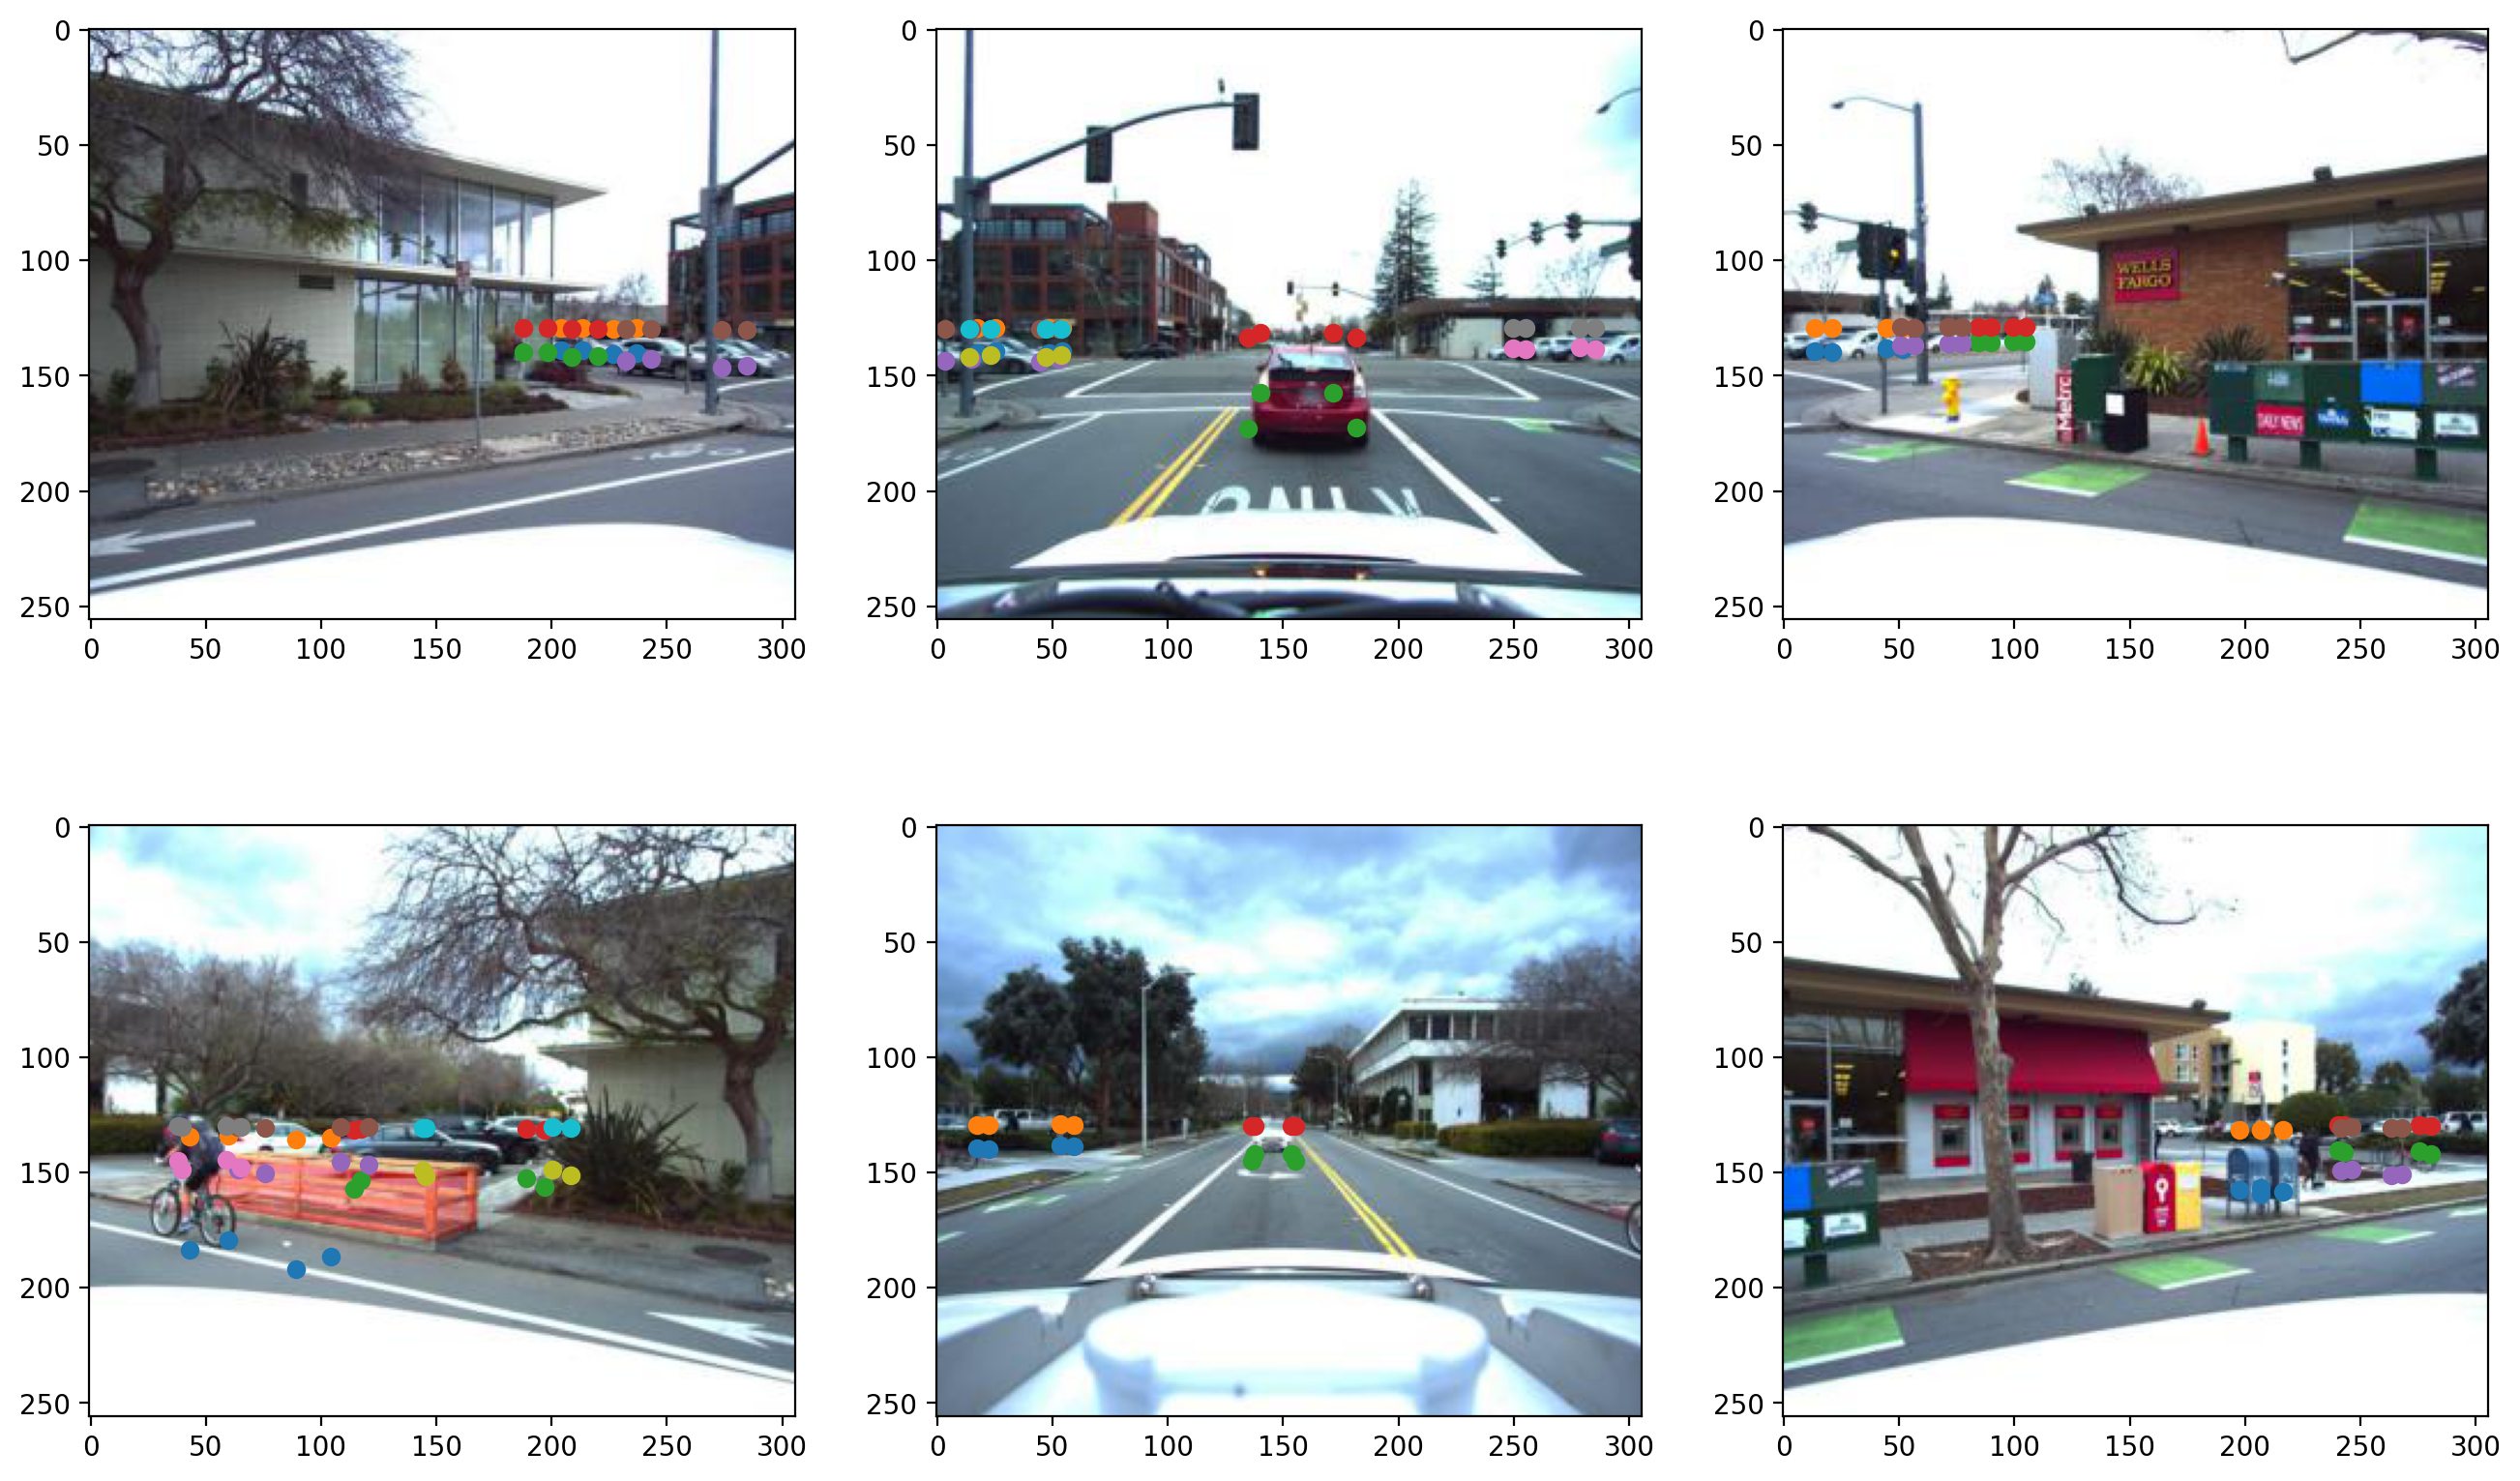

In [47]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

cam_names = ["CAM_FRONT_LEFT", "CAM_FRONT", "CAM_FRONT_RIGHT", "CAM_BACK_LEFT", "CAM_BACK", "CAM_BACK_RIGHT"]
cam_angle = [60,                    0,             -60,           120,            180,          -120]
idx_to_angle = dict(enumerate(cam_angle))

for photo_idx in range(6):
    proj_plane = projections.ProjectionPlane(1.7, 70, idx_to_angle[photo_idx])
    
    axis=axes[photo_idx]

    plot_utils.plot_photos(sample[photo_idx], axis=axis)
    for idx, (valid, yz_42, yz_42_top) in enumerate(zip(proj_plane.is_valid(cars_n),
                                             proj_plane(cars_n), proj_plane(cars_n, 1.5))): # [[0,1,2,4]])):
        if valid:
            axis.scatter(yz_42[:, 0],     yz_42[:, 1], label=idx)
            axis.scatter(yz_42_top[:, 0], yz_42_top[:, 1], label=idx)


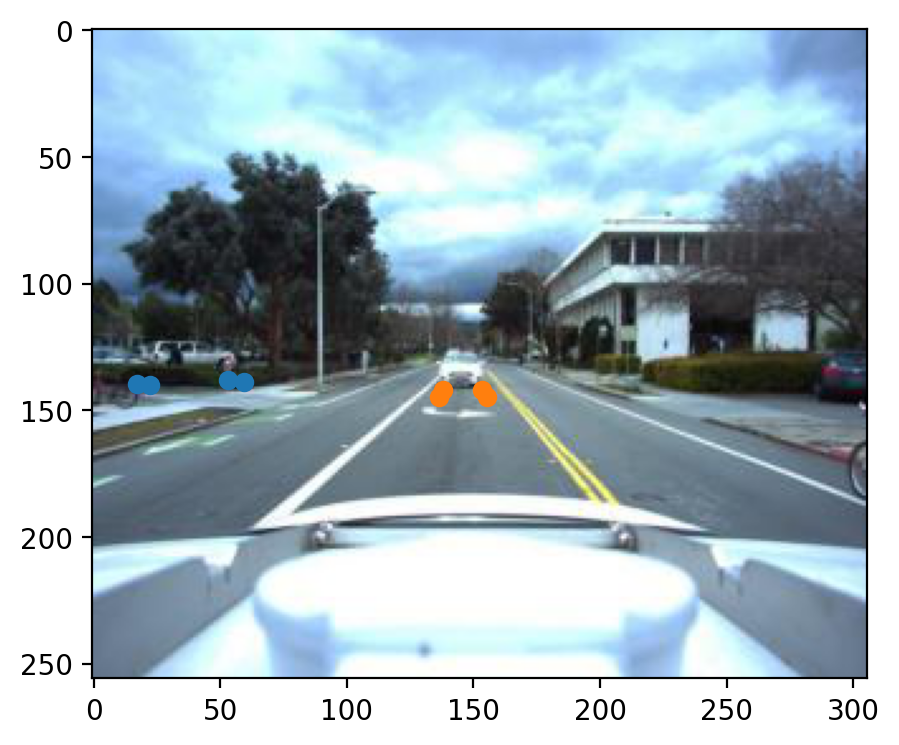

In [30]:
photo_idx = 4
fig, axis = plt.subplots()
# axes = axes.ravel()

proj_plane = projections.ProjectionPlane(1.7, 70, idx_to_angle[photo_idx])
    
# axis=axes[photo_idx]

plot_utils.plot_photos(sample[photo_idx], axis=axis)
for idx, (valid, yz_42, yz_42_top) in enumerate(zip(proj_plane.is_valid(cars_n),
                                         proj_plane(cars_n), proj_plane(cars_n, 1.5))): # [[0,1,2,4]])):
    if valid:
        axis.scatter(yz_42[:, 0],     yz_42[:, 1], label=idx)